## 02 Проучвателен анализ на данни
### Съдържание
1. Използвани библиотеки
2. Общ преглед на файла
3. Преглед на колонките представляващи интерес
4. Статистическо тестване на хипотези

#### 1. Използвани библиотеки
Изпозват се библиотеките pandas, numpy, matplotlib, seaborn и scipy.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import stats

Прочитане на файла

In [2]:
data = pd.read_excel(r'/home/nitro5/Desktop/data/GIS/2nd_semestur/cartography/data_final.xlsx')

#### 2. Общ преглед на файла
Имаме 2105 реда и 22 колонки.

In [3]:
data.shape

(2105, 22)

Предглед на горните 5 реда.

In [4]:
data.head()

,№,Дървесен вид,Вид на документа,Номер на документа,Дата,ДВ,Населено място,Община,Област,РИОСВ,...,Обиколка,Диаметър,Особености,Година,Име на населеното място,Тип на населеното място,Географска ширина,Географска дължина,Дубликати,Номер
0,1.0,Източен чинар,NaN,NaN,NaN,NaN,"гр. Сандански, лятна къпалня",Сандански,Благоевград,Благоевград,...,4.3,NaN,NaN,NaN,Сандански,град,41.565416,23.278643,1,1
1,2.0,Източен чинар,NaN,NaN,NaN,NaN,"гр. Сандански, площада",Сандански,Благоевград,Благоевград,...,4.6,NaN,NaN,NaN,Сандански,град,41.565416,23.278643,1,2
2,3.0,Източен чинар,NaN,NaN,NaN,NaN,"гр. Мелник, площада",Сандански,Благоевград,Благоевград,...,3.5,NaN,NaN,NaN,Мелник,град,41.522942,23.393246,1,3
3,4.0,Източен чинар,Заповед,1858,1961-07-29 00:00:00,NaN,"с. Скрът, край реката",Петрич,Благоевград,Благоевград,...,3.5,NaN,NaN,1961.0,Скрът,село,41.364380,22.996921,1,4
4,5.0,Чинар (Дом на щъркелите),Заповед,1857,1961-07-29 00:00:00,NaN,"гр. Петрич, на площада срещу БНБ",Петрич,Благоевград,Благоевград,...,4.9,NaN,NaN,1961.0,Петрич,град,41.395295,23.206783,1,5


Преглед на колонките, типа на данните и непразните стойности.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   №                        2105 non-null   float64
 1   Дървесен вид             2105 non-null   object 
 2   Вид на документа         2047 non-null   object 
 3   Номер на документа       2047 non-null   object 
 4   Дата                     2047 non-null   object 
 5   ДВ                       1552 non-null   object 
 6   Населено място           2103 non-null   object 
 7   Община                   2105 non-null   object 
 8   Област                   2105 non-null   object 
 9   РИОСВ                    2105 non-null   object 
 10  Възраст в години         1805 non-null   float64
 11  Височина                 2026 non-null   object 
 12  Обиколка                 1932 non-null   float64
 13  Диаметър                 221 non-null    float64
 14  Особености              

Преглед на основните статистики на числовите колонки, като средно, бройка, максималн, минимална стойност, стандартно отклонение и квантилите.

In [6]:
data.describe()

,№,Възраст в години,Обиколка,Диаметър,Година,Географска ширина,Географска дължина,Дубликати,Номер
count,2105.000000,1805.000000,1932.000000,221.000000,2047.000000,2092.000000,2092.000000,2105.000000,2105.000000
mean,1200.321378,218.968975,3.449834,0.902624,1983.855887,42.784660,24.932286,8.749169,904.752969
std,691.874655,125.525137,1.736024,0.454342,19.662953,0.646587,1.459085,17.791349,460.976807
min,1.000000,25.000000,0.300000,0.060000,1940.000000,41.298746,22.471230,1.000000,1.000000
25%,605.000000,150.000000,2.400000,0.600000,1974.000000,42.276781,23.683702,1.000000,520.000000
50%,1205.000000,200.000000,3.100000,0.800000,1980.000000,42.766832,24.872170,1.000000,980.000000
75%,1831.000000,300.000000,4.100000,1.150000,1991.000000,43.325495,25.920075,7.000000,1393.000000
max,2377.000000,1200.000000,17.600000,2.950000,2024.000000,44.115352,28.402640,80.000000,1395.000000


#### 3. Преглед на колонките представляващи интерес
Това са 20те най-често срещани дървесни вида.

In [7]:
data['Дървесен вид'].value_counts().head(20)

Дървесен вид
Летен дъб        632
Цер              322
Зимен дъб        137
Тис               81
Благун            76
Космат дъб        71
Бук               65
Чинар             64
Полски ясен       51
Смърч             49
Ясен              39
Източен чинар     37
Бял бор           36
Дъб               33
Черна топола      29
Черен бор         25
Бяла топола       19
Бадем             19
Бряст             18
Полски бряст      17
Name: count, dtype: int64

Поради причината, че кода в долната клетка се преизползва се създава функция plot_most_common_tree, която може да приема параметри колко от най-често срещаните да показва, какво дали абсолютно или относително.

In [8]:
def plot_most_common_tree(n = 10, relative=False):  # Number of top values to display
    if relative is False:
        category_counts = data['Дървесен вид'].value_counts()
    else:
        category_counts = data['Дървесен вид'].value_counts(normalize=True) * 100
    top_n_categories = category_counts.nlargest(n)

    ax = sns.barplot(x=top_n_categories.index, y=top_n_categories.values)
    ax.tick_params(axis='x', rotation=90)
    plt.xlabel("Вид")
    plt.ylabel("Честота")
    if relative is False:
        plt.title(f" {n} най-често срещаните дъвесни видове в България от регистъра на вековните дървета!")
    else:
        plt.title(f" {n} относително в % най-често срещаните дъвесни видове в България от регистъра на вековните дървета!")
    plt.show()

Барплот на най-често срещаните видове в абсолюни бройки.

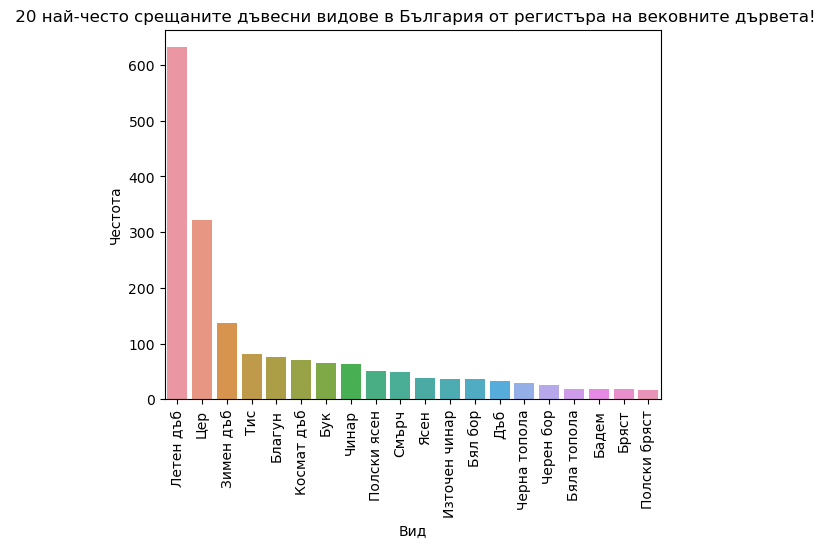

In [9]:
plot_most_common_tree(20)

Барплот на най-често срещаните видове в относителни стойности.

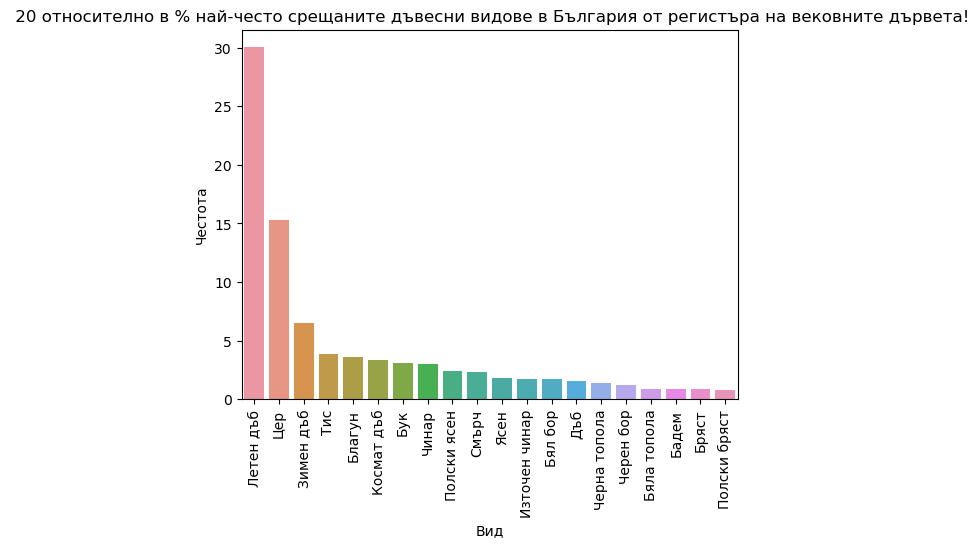

In [10]:
plot_most_common_tree(20, relative=True)

Друг метод на визуализация този път с кръгова диаграма. Пак кода се преизползва като взима само бройката, останалите са записани като 'Други'.

In [11]:
def plot_most_common_tree(n = 10):
    category_counts = data['Дървесен вид'].value_counts()
    top_n_categories = category_counts.nlargest(n).index
    data['Групи дървета'] = data['Дървесен вид'].where(data['Дървесен вид'].isin(top_n_categories), 'Други')
    category_counts_with_others = data['Групи дървета'].value_counts()
    plt.pie(category_counts_with_others, labels=category_counts_with_others.index, autopct='%1.1f%%', startangle=90) # autopct formats the percentage label

    # Add a title
    plt.title("Разпределение на дърветата")
    plt.xticks(rotation=45, ha='right') 
    # Ensure a circular pie chart
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

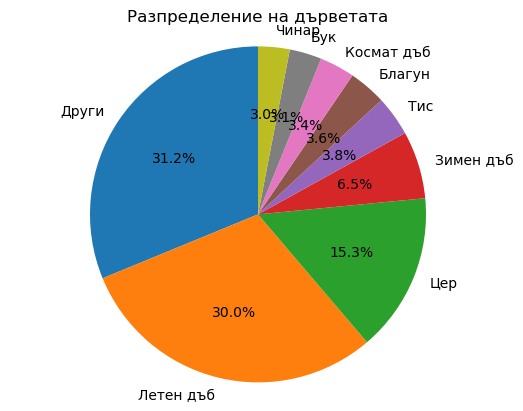

In [12]:
plot_most_common_tree(8)

Преглед на бройките на документите.

In [13]:
data['Вид на документа'].value_counts()

Вид на документа
Заповед          1893
Препис             80
Постановление      74
Name: count, dtype: int64

За да проверим как са се променяли нещата по години, ще създадем работна колонка десетилетие и ще го визуализираме.

In [14]:
data['Десетилетие'] = round((data['Година'] // 10) * 10,0)
#data['Десетилетие'].value_counts()

Най-много са обявени през 70те години.

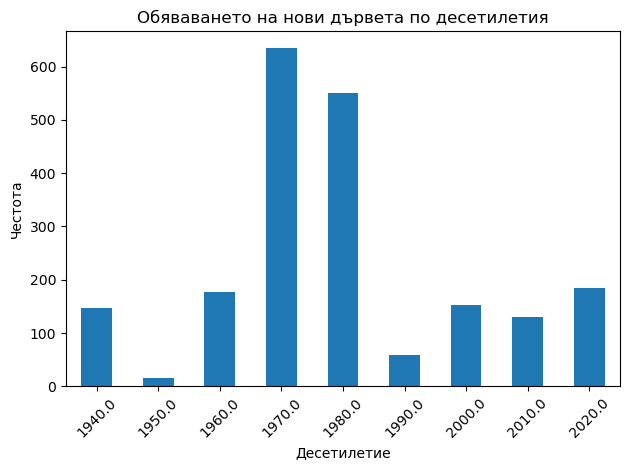

In [15]:
data['Десетилетие'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Десетилетие")
plt.ylabel("Честота")
plt.title("Обяваването на нови дървета по десетилетия")
plt.xticks(rotation=45) # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

Подобно разпределние в обносителна бройка с кръгова диаграма.

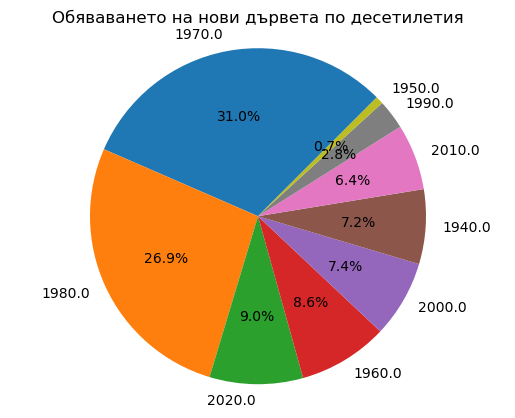

In [16]:
plt.pie(data['Десетилетие'].value_counts(), labels=data['Десетилетие'].value_counts().index, autopct='%1.1f%%', startangle=45) 
# Add a title
plt.title("Обяваването на нови дървета по десетилетия")
plt.xticks(rotation=45, ha='right') 
# Ensure a circular pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Разпределението по области.

In [17]:
data['Област'].value_counts()

Област
София             243
Плевен            227
Хасково           194
Враца             114
Габрово           114
Монтана           106
Сливен            105
Велико Търново     97
Бургас             81
Пловдив            79
Перник             70
Смолян             55
Ловеч              53
Пазарджик          52
Добрич             51
Русе               50
Варна              50
Благоевград        48
Кюстендил          45
Видин              42
Стара Загора       41
Кърджали           39
Ямбол              34
Търговище          31
Разград            31
София-град         20
Шумен              17
Силистра           15
-                   1
Name: count, dtype: int64

In [18]:
def plot_most_common_province(n = 10, relative=False):  # Number of top values to display
    if relative is False:
        category_counts = data['Област'].value_counts()
    else:
        category_counts = data['Област'].value_counts(normalize=True) * 100
    top_n_categories = category_counts.nlargest(n)
    sns.set_palette("viridis")
    palette = sns.color_palette(["red", "green", "blue", 'brown', 'yellow', 'gray'])
    ax = sns.barplot(x=top_n_categories.index, y=top_n_categories.values, palette=palette)
    ax.tick_params(axis='x', rotation=90)
    plt.xlabel("Област")
    plt.ylabel("Честота")
    if relative is False:
        plt.title(f" {n} най-често срещаните области по абсолютна бройка в България от регистъра на вековните дървета!")
    else:
        plt.title(f" {n} относително в % най-често срещаните по относителна бройка в България от регистъра на вековните дървета!")
    plt.show()

Визуализацията по области пак се извършва с подобна функция plot_most_common_province.

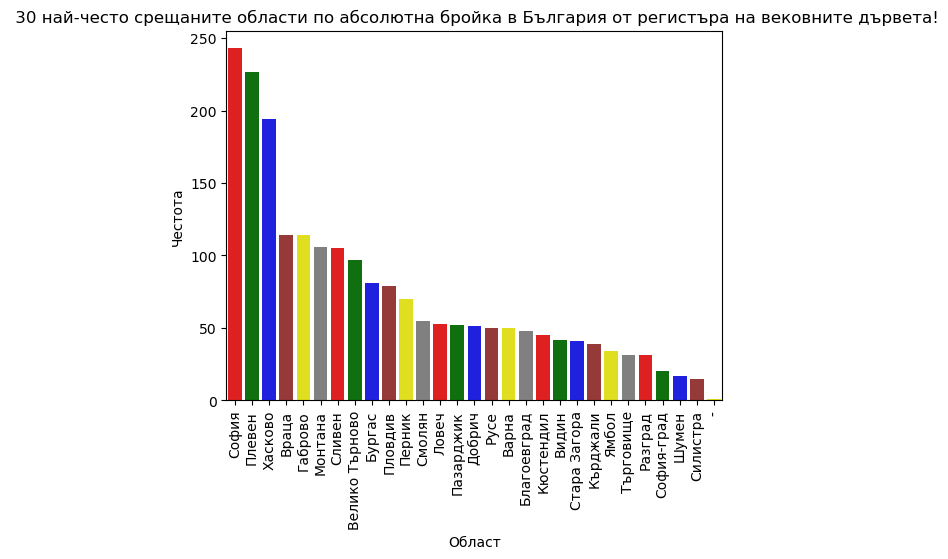

In [19]:
plot_most_common_province(30)

In [20]:
def plot_most_common_province(n = 10, relative=False):  # Number of top values to display
    if relative is False:
        category_counts = data['Област'].value_counts()
    else:
        category_counts = data['Област'].value_counts(normalize=True) * 100
    top_n_categories = category_counts.nlargest(n)
    sns.set_palette("viridis")
    palette = sns.color_palette(["green"])
    ax = sns.barplot(x=top_n_categories.index, y=top_n_categories.values, palette=palette)
    ax.tick_params(axis='x', rotation=90)
    plt.xlabel("Област")
    plt.ylabel("Честота")
    if relative is False:
        plt.title(f" {n} най-често срещаните области по абсолютна бройка в България от регистъра на вековните дървета!")
    else:
        plt.title(f" {n} относително в % най-често срещаните по относителна бройка в България от регистъра на вековните дървета!")
    plt.show()

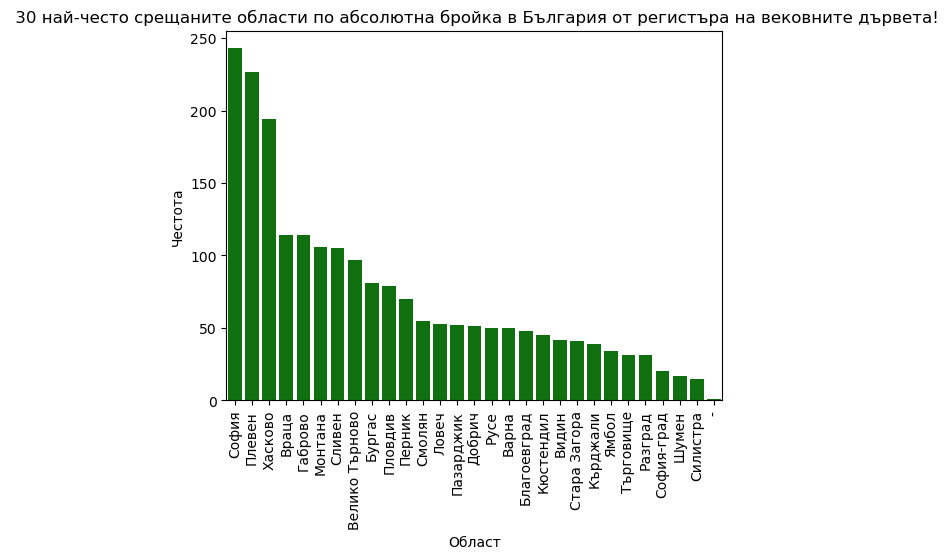

In [21]:
plot_most_common_province(30)

In [22]:
data.columns

Index(['№', 'Дървесен вид', 'Вид на документа', 'Номер на документа', 'Дата',
       'ДВ', 'Населено място', 'Община', 'Област', 'РИОСВ', 'Възраст в години',
       'Височина', 'Обиколка', 'Диаметър', 'Особености', 'Година',
       'Име на населеното място', 'Тип на населеното място',
       'Географска ширина', 'Географска дължина', 'Дубликати', 'Номер',
       'Групи дървета', 'Десетилетие'],
      dtype='object')

За колонките с числови стойностти ще използваме хистограма. Създава се нова функция plot_hist.

In [23]:
def plot_hist(col, bins=10, color = 'blue'):
    sns.histplot(data[col], color = color, bins = bins)
    plt.xlabel(col)
    plt.ylabel("Честота")
    plt.title(f"Разпределение на {col} на дърветата в {bins} групи")
    plt.show()

Възрастта по дървета с 100 бинове.

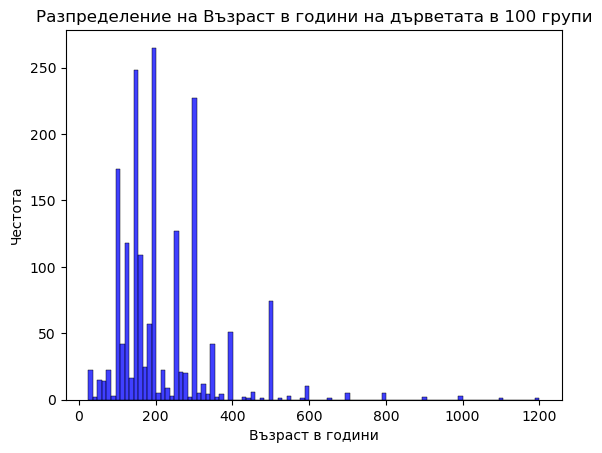

In [24]:
plot_hist(col = 'Възраст в години', bins = 100)

Възрастта по дървета с 10 бинове.

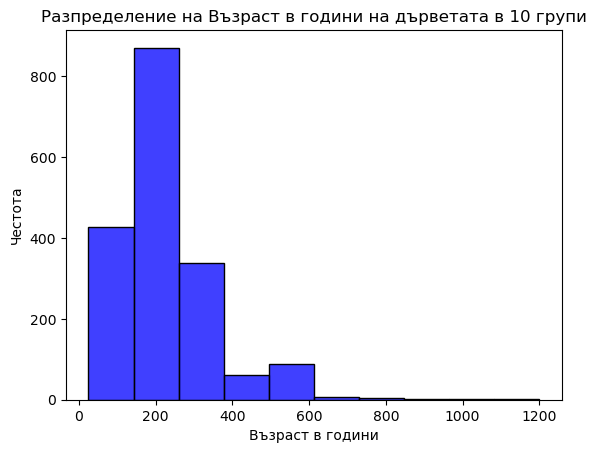

In [25]:
plot_hist(col = 'Възраст в години')

Друг тип на графиката с изглаждане и честота.

/home/nitro5/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


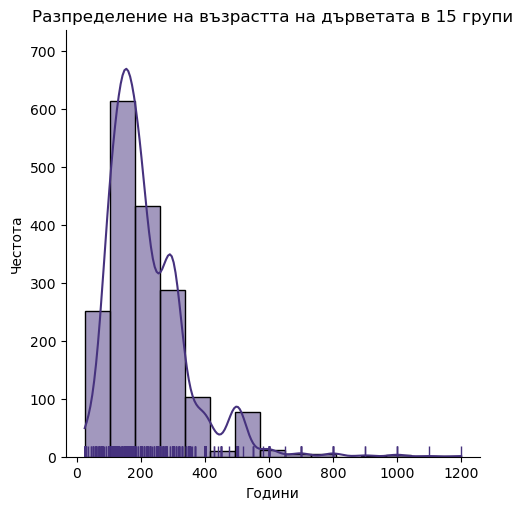

In [26]:
sns.displot(data['Възраст в години'], kde=True, rug=True, bins = 15)  # kde=False removes the density curve, rug=False removes the rug plot
plt.xlabel("Години")
plt.ylabel("Честота")
plt.title("Разпределение на възрастта на дърветата в 15 групи")
plt.show()

Бокспло, показва средната стойност, стандарносто отклонение и наличието на аутлаери.

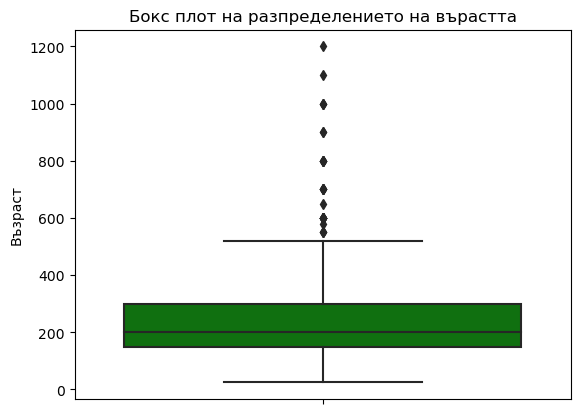

In [27]:
sns.boxplot(y=data['Възраст в години'], color = 'green')  # Only the y-axis is needed for a single distribution
plt.ylabel("Възраст")
plt.title("Бокс плот на разпределението на върастта")
plt.show()

Подобно е положението на Обиколката на дърветата.

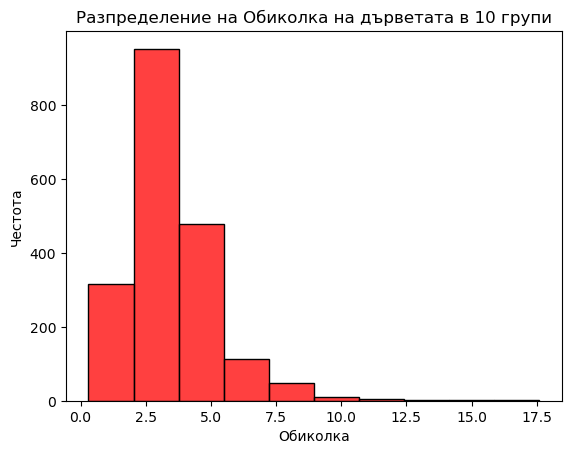

In [28]:
plot_hist(col = 'Обиколка', bins = 10, color = 'red')

Както и на диаметъра.

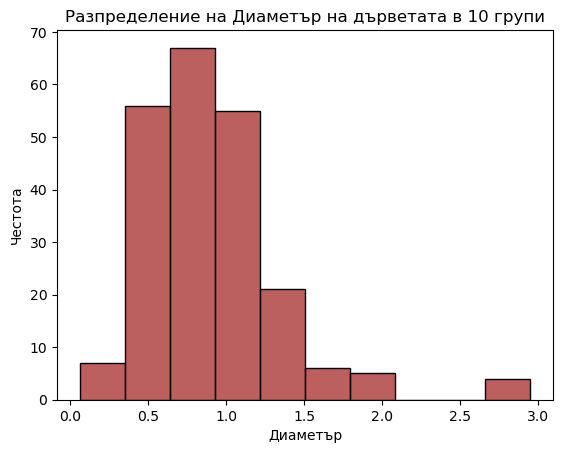

In [29]:
plot_hist(col = 'Диаметър', bins = 10, color = 'brown')

In [30]:
data['Височина'] = pd.to_numeric(data['Височина'], errors='coerce') # Convert to numeric
data['Височина'] = data['Височина'].astype('float64')

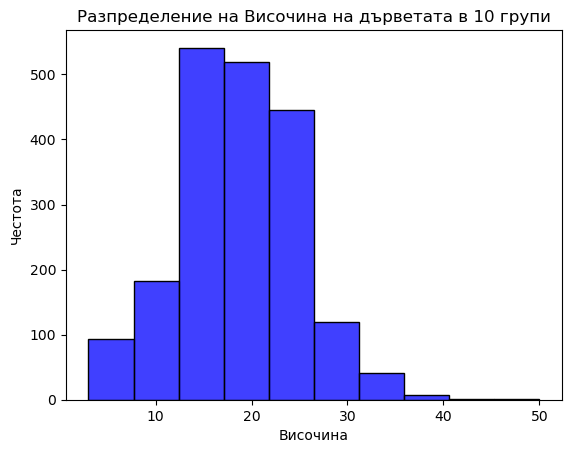

In [31]:
plot_hist(col = 'Височина', bins = 10, color = 'blue')

На база на хистограмите може да се заключи, че числовите колонки апроксимират нормално разпределение.

Огромната част от населените места са села.

In [32]:
data['Тип на населеното място'].value_counts()

Тип на населеното място
село                     1501
град                      585
манастир                    5
курорт                      3
квартал                     3
път і-1 враца-монтана       2
остров батин                1
Name: count, dtype: int64

Точкова графика на зависимостта между обиколката и височината има положителна корелация.

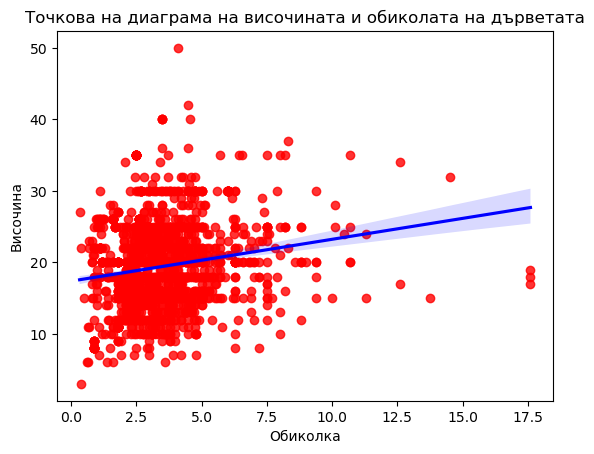

In [33]:
sns.regplot(x='Обиколка', y='Височина', data=data, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.xlabel("Обиколка")
plt.ylabel("Височина")
plt.title("Точкова на диаграма на височината и обиколата на дърветата")
plt.show()

По-слаба е корелацията между Височината и възрастта.

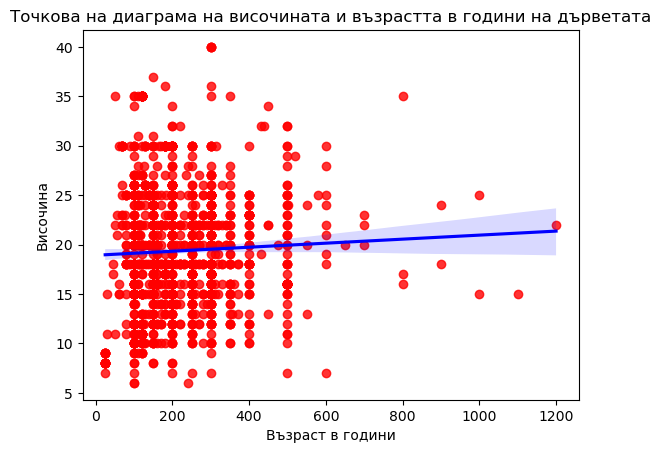

In [34]:
sns.regplot(x='Възраст в години', y='Височина', data=data, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.xlabel("Възраст в години")
plt.ylabel("Височина")
plt.title("Точкова на диаграма на височината и възрастта в години на дърветата")
plt.show()

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   №                        2105 non-null   float64
 1   Дървесен вид             2105 non-null   object 
 2   Вид на документа         2047 non-null   object 
 3   Номер на документа       2047 non-null   object 
 4   Дата                     2047 non-null   object 
 5   ДВ                       1552 non-null   object 
 6   Населено място           2103 non-null   object 
 7   Община                   2105 non-null   object 
 8   Област                   2105 non-null   object 
 9   РИОСВ                    2105 non-null   object 
 10  Възраст в години         1805 non-null   float64
 11  Височина                 1950 non-null   float64
 12  Обиколка                 1932 non-null   float64
 13  Диаметър                 221 non-null    float64
 14  Особености              

Боксплот като сравняваме стойностите по област и височините.

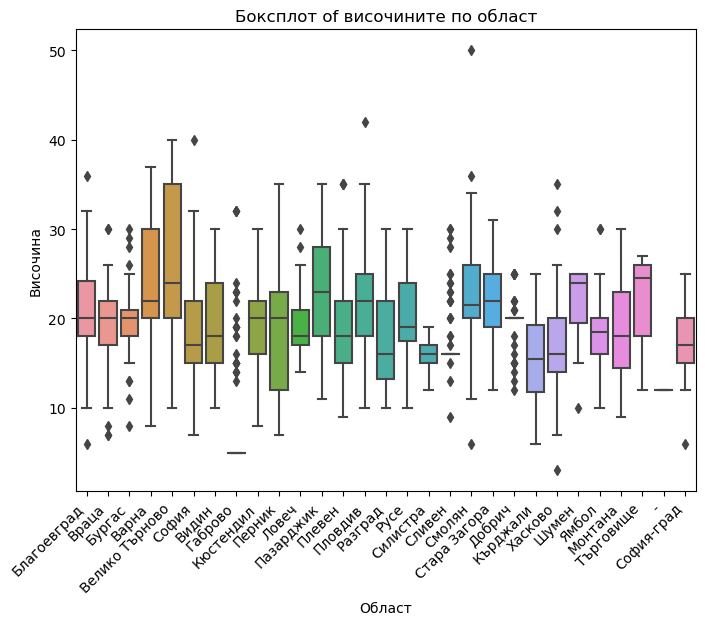

In [36]:
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size

sns.boxplot(x='Област', y='Височина', data=data)  # Use seaborn

plt.title('Боксплот of височините по област')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Област')  # Optional: Customize x-axis label
plt.ylabel('Височина')

plt.show()

#### 4. Статистическо тестване на хипотези
Ще направим статистическо тестване на хипотези между средната височина на дървета в областите София и Видин

In [37]:
sofia_heights = data['Височина'][data['Област'] == 'София']
vidin_heights = data['Височина'][data['Област'] == 'Видин']

Средна височина за София.

In [39]:
sofia_heights.mean()

17.9

In [65]:
len(sofia_heights.dropna())

230

Извиличаме еднакъв брой стойности от 2те групи.

In [68]:
len(sofia_heights.dropna()[:37])

37

Средна стойност за Видин

In [41]:
vidin_heights.mean()

18.864864864864863

In [67]:
len(vidin_heights.dropna())

37

Поради малките бройки ще използваме теста на Стюдент. Резулата е, че съществува такава разлика в извадките.

In [75]:
t_stat, p_value = stats.ttest_rel(sofia_heights.dropna()[:37], vidin_heights.dropna())

# Print the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Има статисическа разлика в 2те извадки.")
else:
    print("Няма статисическа разлика в 2те извадки.")

T-statistic: 2.26
P-value: 0.030
Има статисическа разлика в 2те извадки.


Боксплот на върастта на дърветата по област

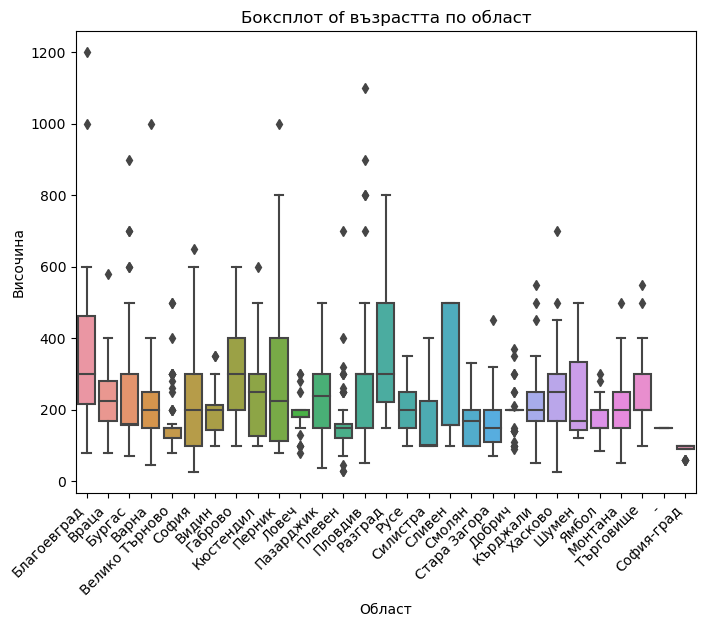

In [44]:
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size

sns.boxplot(x='Област', y='Възраст в години', data=data)  # Use seaborn

plt.title('Боксплот of възрастта по област')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Област')  # Optional: Customize x-axis label
plt.ylabel('Височина')

plt.show()

Повтаряме процедурата тук за областите Ловеч и Ямбол.

In [48]:
lovech_age = data['Възраст в години'][data['Област'] == 'Ловеч']
yambol_age = data['Възраст в години'][data['Област'] == 'Ямбол']

In [49]:
lovech_age.mean()

182.72727272727272

In [71]:
len(lovech_age.dropna())

33

In [50]:
yambol_age.mean()

166.875

In [72]:
len(yambol_age.dropna())

24

In [74]:
t_stat, p_value = stats.ttest_ind(lovech_age.dropna()[:24], yambol_age.dropna())

# Print the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Има статистически значима разлика между извадките на 2те областти.")
else:
    print("Няма статистически значима разлика между извадките на 2те областти.")

T-statistic: 1.06
P-value: 0.295
Няма статистически значима разлика между извадките на 2те областти.
